In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import time
from tqdm.notebook import tqdm

# Global Variables

In [3]:
"""Activation Functions"""
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def learn_using_gradient_descent_with_sigmoid_function(train_images, train_labels, weights, val_images, val_labels):
    iters = []
    error_values = []
    error_values_val = []

    for i in range(iterations):
        ### train
        h = np.dot(train_images, weights)
        h = sigmoid(h)
        error_value = (np.dot(-1 * train_labels.T, np.log(h)) - np.dot((1 - train_labels).T,
                                                                       np.log(1 - h))) / training_size
        gradient = np.dot(train_images.T, h - train_labels) / training_size
        weights = weights - (gradient * alpha)
        iters.append(i)
        error_values.append(error_value[0, 0])
        
        ### validation
        h_val = np.dot(val_images, weights)
        h_val = sigmoid(h_val)
        error_values_val = (np.dot(-1 * train_labels.T, np.log(h_val)) - np.dot((1 - train_labels).T,
                                                                       np.log(1 - h_val))) / val_size
        error_values_val.append(error_values_val[0, 0])
        

    global gradient_curve

    if gradient_curve:
        """"Plotting Iterations vs Training Error"""

        plt.ylabel('Training Error', fontsize=14)
        plt.xlabel('Iteration', fontsize=14)
        plt.title("Iterations vs Training Error and Validation Error for Gradient Descent with Sigmoid Func.", fontsize=16, color='green')
        plt.plot(iters, error_values)
        plt.plot(iters, error_values_val)
        figure = plt.gcf()  # get current figure
        figure.set_size_inches(13, 7)

        plt.savefig("Iterations vs Training Error for Gradient Descent with Sigmoid Func.png", dpi=300)
        plt.clf()

        gradient_curve = False

    return weights

In [4]:
# Global Variables

training_size = 63325
val_size = 450
testing_size = 450

alpha = 0.01
iterations = 500  # epochs for batch mode gradient descent

gradient_curve = True
epoch_curve = True

"""Since we are not sure that the dataset is linearly separable or not, therefore to avoid infinite looping in weights training
we iterate over the training set epoch times for tuning weights"""
epochs = 15  # epochs for perceptron rule (currently stochastic mode is used)

labels = 50

In [5]:
trainDF = pd.read_csv("HSV_LBPs_train.csv")
train_images = trainDF.iloc[:,:-1].copy().values
train_labels = trainDF.iloc[:,-1].copy().values

testDF = pd.read_csv("HSV_LBPs_test.csv")
test_images = testDF.iloc[:,:-1].copy().values
test_labels = testDF.iloc[:,-1].copy().values

valDF = pd.read_csv("HSV_LBPs_val.csv")
val_images = valDF.iloc[:,:-1].copy().values
val_labels = valDF.iloc[:,-1].copy().values

In [6]:
train_images.shape

(63325, 9)

In [7]:
# add 1's as x0
train_images = np.hstack((np.ones((training_size, 1)), train_images))

# add w0 as 0 initially
all_weights = np.zeros((labels, train_images.shape[1]))

train_labels = train_labels.reshape((training_size, 1))

train_labels_copy = np.copy(train_labels)

iters = []
error_values_iter = []
train_acc = []
val_acc = []


for i in tqdm(range(iterations)):
    error_values = []
    if i == 0:
        train_weights = np.zeros((train_images.shape[1], 1))
    else:
        train_weights = all_weights.copy()
        
    for j in range(labels):

        print("Training Classifier: ", j+1)
        train_labels = np.copy(train_labels_copy)

        # initialize all weights to zero
        weights = np.zeros((train_images.shape[1], 1))

        for k in range(training_size):
            if train_labels[k, 0] == j:
                train_labels[k, 0] = 1
            else:
                train_labels[k, 0] = 0
        
        if i == 0:
            ### train init
            h = np.dot(train_images, weights)
            h = sigmoid(h)
            error_value = (np.dot(-1 * train_labels.T, np.log(h)) - np.dot((1 - train_labels).T,
                                                                           np.log(1 - h))) / training_size
            gradient = np.dot(train_images.T, h - train_labels) / training_size
            weights = weights - (gradient * alpha)
            error_values.append(error_value[0, 0])

            all_weights[j, :] = weights.T
        else:
            ### train 
            h = np.dot(train_images, train_weights[j, :].reshape(10,1))
            h = sigmoid(h)
            error_value = (np.dot(-1 * train_labels.T, np.log(h)) - np.dot((1 - train_labels).T,
                                                                           np.log(1 - h))) / training_size
            gradient = np.dot(train_images.T, h - train_labels) / training_size
            weights = train_weights[j, :].reshape(10,1) - (gradient * alpha)
            
            error_values.append(error_value[0])

            all_weights[j, :] = weights.T
         
    iters.append(i)
    error_values_iter.append(np.mean(error_values))
    
    ### predict 
    ### train
#     train_images_real = np.hstack((np.ones((training_size, 1)), train_images))
    predicted_labels = np.dot(all_weights, train_images.T)
    # sigmoid activation function
    predicted_labels = sigmoid(predicted_labels)
    predicted_labels = np.argmax(predicted_labels, axis=0)
    
    train_acc.append(accuracy_score(train_labels, predicted_labels.T))
    
    ### validation
    val_images_real = np.hstack((np.ones((val_size, 1)), val_images))
    predicted_labels = np.dot(all_weights, val_images_real.T)
    # sigmoid activation function
    predicted_labels = sigmoid(predicted_labels)
    predicted_labels = np.argmax(predicted_labels, axis=0)
    
    val_acc.append(accuracy_score(val_labels, predicted_labels.T))


  0%|          | 0/500 [00:00<?, ?it/s]

Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training 

Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training 

Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training 

Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training 

Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training 

Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Tra

Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training 

Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training 

Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
T

Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training 

Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training 

Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training 

Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training 

Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Trai

Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training 

Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training 

Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50


Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training 

Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training 

Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
T

Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training 

Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training 

Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training 

Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training 

Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Tr

Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training 

Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training 

Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49


Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training 

Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training 

Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Trai

Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training 

Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training

Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training 

Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training 

Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Tra

Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training 

Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training 

Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
T

Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training 

Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training 

Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Tr

Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training 

Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training 

Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Traini

Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training 

Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training

Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training 

Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training 

Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Tra

Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training 

Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training 

Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50


Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training 

Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training 

Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Train

Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training 

Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Trainin

Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training 

Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training 

Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Trai

Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training 

Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training 

Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49


Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training 

Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training 

Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Trai

Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training 

Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Trainin

Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training 

Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training 

Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Train

Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training 

Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training 

Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training Classifier:  34
Training Classifier:  35
Training Classifier:  36
Training Classifier:  37
Training Classifier:  38
Training Classifier:  39
Training Classifier:  40
Training Classifier:  41
Training Classifier:  42
Training Classifier:  43
Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Tr

Training Classifier:  44
Training Classifier:  45
Training Classifier:  46
Training Classifier:  47
Training Classifier:  48
Training Classifier:  49
Training Classifier:  50
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Classifier:  20
Training Classifier:  21
Training Classifier:  22
Training Classifier:  23
Training Classifier:  24
Training Classifier:  25
Training Classifier:  26
Training Classifier:  27
Training Classifier:  28
Training Classifier:  29
Training Classifier:  30
Training Classifier:  31
Training Classifier:  32
Training Classifier:  33
Training 

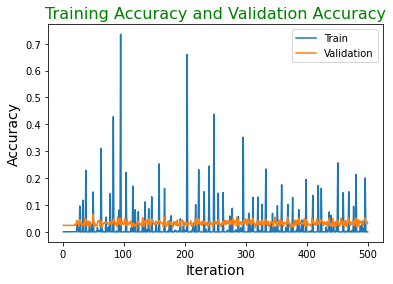

In [13]:
""""Plotting Training Accuracy and Validation Accuracy"""

plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.title("Training Accuracy and Validation Accuracy", fontsize=16, color='green')
plt.plot(list(range(1,501)), train_acc)
plt.plot(list(range(1,501)), val_acc)
plt.legend(['Train', 'Validation'], loc='best')

In [71]:
def topk_Acc(k, RealLabel, PreLabelProb):
    """
    k: top k
    RealLabel: shape -> (num, 1)
    PreLabelProb: shape -> (num, class_num)
    """
    max_k_preds = PreLabelProb.argsort(axis=1)[:, -k:][:, ::-1] #得到top-k label
    match_array = np.logical_or.reduce(max_k_preds==RealLabel, axis=1) #得到匹配結果
    topk_acc_score = match_array.sum() / match_array.shape[0]
    
    return round(topk_acc_score, 4)

In [72]:
### validation
val_images_real = np.hstack((np.ones((val_size, 1)), val_images))
predicted_labels = sigmoid(np.dot(all_weights, val_images_real.T))

val_real = val_labels.reshape(450,1)
val_pred_score = predicted_labels.T.copy()

### test
test_images_real = np.hstack((np.ones((testing_size, 1)), test_images))
predicted_labels = sigmoid(np.dot(all_weights, test_images_real.T))

test_real = test_labels.reshape(450,1)
test_pred_score = predicted_labels.T.copy()

top1_Acc_val = topk_Acc(1,val_real,val_pred_score)
top5_Acc_val = topk_Acc(5, val_real, val_pred_score)

top1_Acc_test = topk_Acc(1, test_real, test_pred_score)
top5_Acc_test = topk_Acc(5, test_real, test_pred_score)

print("Top 1 Validation Accuracy: ", top1_Acc_val)
print("Top 5 Validation Accuracy: ", top5_Acc_val)
print("Top 1 Test Accuracy: ", top1_Acc_test)
print("Top 5 Test Accuracy: ", top5_Acc_test)

Top 1 Validation Accuracy:  0.0311
Top 5 Validation Accuracy:  0.1111
Top 1 Test Accuracy:  0.0356
Top 5 Test Accuracy:  0.1111
